In [160]:
import pandas as pd

In [161]:
#subject 10159 (Control) Bart
bart = pd.read_csv('/Users/sarahting/desktop/sub-10159_func_sub-10159_task-bart_events.tsv', sep='\t')

bart[bart['trial_type']=='BALOON'].head(20)
bart_b1 = bart[bart['trial_type']=='BALOON']
bart_b1.groupby('trial_number').max().shape #there are 19 trials

#you either cashout or explode, so taking the max_value for trial_cumulative_value does give you the last action of each trial and the amount that you get if it's a cashout.
#or simply just get the average cashout of all trials. (total cashout / total number of trials)
bart[(bart['trial_type']=='BALOON') & (bart['action']=='CASHOUT')].sum() #cumulative_value = 205
avg_score = 205/19
avg_score


10.789473684210526

In [162]:
bart_b1.groupby('trial_number').mean().shape

(19, 9)

In [233]:
#bart score = adjusted average number of pumps on unexploded balloons
unexploded_trial_no = bart[(bart['trial_type']=='BALOON') & (bart['action']=='CASHOUT')]['trial_number']
list(unexploded_trial_no)
unexploded_trials = bart[(bart['trial_type']=='BALOON') & (bart.trial_number.isin(list(unexploded_trial_no)))]
total_pumps = unexploded_trials[unexploded_trials['action']!='CASHOUT'].count() #total pumps in unexploded trials
total_pumps #41

#number of trials without explosion
unexploded_trial_no.count() 
#there are 13 unexploded baloon trials
score = 41/13
score

3.1538461538461537

In [242]:
def bart_score(bart):
    unexploded_trial_no = bart[(bart['trial_type']=='BALOON') & (bart['action']=='CASHOUT')]['trial_number']
    unexploded_trials = bart[(bart['trial_type']=='BALOON') & (bart.trial_number.isin(list(unexploded_trial_no)))]
    total_pumps = unexploded_trials[unexploded_trials['action']!='CASHOUT'].count()
    score = total_pumps[0]/unexploded_trial_no.count()
    return round(score,2)

In [274]:
bart_C10159 = pd.read_csv('/Users/sarahting/desktop/bart/Control/sub-10171_func_sub-10171_task-bart_events.tsv', sep='\t')
bart_C10159.head()
#bart_score(bart_C10159)

,onset,duration,reaction_time,trial_number,trial_type,button_pressed,action,explode_trial,trial_value,trial_cumulative_value,payoff_level,onset_noTriggerAdjust
0,0.079379,0.679065,0.679065,1,CONTROL,5.0,ACCEPT,1,0,0,0,0.079379
1,2.743493,0.262977,0.262977,1,CONTROL,5.0,ACCEPT,1,0,0,0,2.743493
2,5.903927,0.246516,0.246516,1,CONTROL,5.0,ACCEPT,1,0,0,0,5.903927
3,8.816197,0.270252,0.270252,1,CONTROL,5.0,ACCEPT,1,0,0,0,8.816197
4,10.669428,0.265167,0.265167,1,CONTROL,5.0,ACCEPT,1,0,0,0,10.669428


In [ ]:
#Control Bart Files
bart_C10159 = pd.read_csv('/Users/sarahting/desktop/bart/Control/sub-10159_func_sub-10159_task-bart_events.tsv', sep='\t')





In [83]:
#subject 50004(Schizo) Bart
bart2 = pd.read_csv('/Users/sarahting/desktop/sub-50004_func_sub-50004_task-bart_events.tsv', sep='\t')
bart2[bart2['trial_type']=='BALOON'].head(20)
bart_b = bart2[bart2['trial_type']=='BALOON']
bart_b.groupby('trial_number').max().shape #there are 10 total trials for baloons
bart2[(bart2['trial_type']=='BALOON') & (bart2['action']=='CASHOUT')].sum() #cumulative_value = 95
avg_score = 95/10
avg_score
#(total cashout / total number of trials)

9.5

In [148]:
#bart score = adjusted average number of pumps on unexploded balloons
b2_unexploded_trial_no = bart2[(bart2['trial_type']=='BALOON') & (bart2['action']=='CASHOUT')]['trial_number']
list(b2_unexploded_trial_no)
b2_unexploded_trials = bart2[(bart2['trial_type']=='BALOON') & (bart2.trial_number.isin(list(b2_unexploded_trial_no)))]
b2_total_pumps = b2_unexploded_trials[b2_unexploded_trials['action']!='CASHOUT'].count() #total pumps in unexploded trials
b2_total_pumps #19

#number of trials without explosion
print(b2_unexploded_trial_no.count())
#there are 13 unexploded baloon trials

#10 total trials for b2 baloons
b2_score = 19/7
b2_score

7


2.7142857142857144

In [25]:
#df = pd.read_csv('/Users/sarahting/desktop/sub-10159_func_sub-10159_task-bart_bold.nii.gz', compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False)

In [35]:
#participants
p = pd.read_csv('/Users/sarahting/desktop/participants.tsv', sep='\t')
print(p[p["diagnosis"]!='CONTROL'].shape) #there are 142 patients
print(p[p["diagnosis"]=='CONTROL'].shape) #130 controls

(142, 16)
(130, 16)


In [37]:
p.head(10)

,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost
0,sub-10159,CONTROL,30,F,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
1,sub-10171,CONTROL,24,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
2,sub-10189,CONTROL,49,M,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
3,sub-10193,CONTROL,40,M,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35343.0,No_ghost
4,sub-10206,CONTROL,21,M,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
5,sub-10217,CONTROL,33,F,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
6,sub-10225,CONTROL,35,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
7,sub-10227,CONTROL,31,F,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
8,sub-10228,CONTROL,40,F,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
9,sub-10235,CONTROL,22,M,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost


In [56]:
p[p["diagnosis"]!='CONTROL'].head()

,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost
130,sub-50004,SCHZ,37,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35343.0,ghost
131,sub-50005,SCHZ,40,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,ghost
132,sub-50006,SCHZ,44,F,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
133,sub-50007,SCHZ,47,F,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
134,sub-50008,SCHZ,48,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,ghost


In [153]:
p.shape #total 272 participants
p[p['diagnosis']=='SCHZ'].count() #50 schizophrenic patients
p[p['diagnosis']=='CONTROL'].count() #130 controls 

participant_id         130
diagnosis              130
age                    130
gender                 130
bart                   124
bht                    119
dwi                    123
pamenc                  82
pamret                  82
rest                   127
scap                   127
stopsignal             126
T1w                    125
taskswitch             125
ScannerSerialNumber    130
ghost_NoGhost          130
dtype: int64

In [263]:
p[(p['diagnosis']=='SCHZ') & (p['bart']==1.0) & (p['scap']==1.0) & (p['stopsignal']==1.0) & (p['taskswitch']==1.0) & p['bht']==1.0].count()
#there are 49 schizo participants where they have all behavioral tests.

p[(p['diagnosis']=='SCHZ') & (p['bart']==1.0) & (p['scap']==1.0) & (p['stopsignal']==1.0) & (p['taskswitch']==1.0) & p['bht']==1.0].head()
#these are the schizo patients with full sets of behavioral data.


,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost
130,sub-50004,SCHZ,37,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35343.0,ghost
131,sub-50005,SCHZ,40,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,ghost
132,sub-50006,SCHZ,44,F,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
133,sub-50007,SCHZ,47,F,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
134,sub-50008,SCHZ,48,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,ghost


In [264]:
p[(p['diagnosis']=='CONTROL') & (p['bart']==1.0) & (p['scap']==1.0) & (p['stopsignal']==1.0) & (p['taskswitch']==1.0) & p['bht']==1.0].count()
#there are 111 controls where they have all behavioral tests
p[(p['diagnosis']=='CONTROL') & (p['bart']==1.0) & (p['scap']==1.0) & (p['stopsignal']==1.0) & (p['taskswitch']==1.0) & p['bht']==1.0].head()
#these are the controls with the full sets of behavioral data

,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost
1,sub-10171,CONTROL,24,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
6,sub-10225,CONTROL,35,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
8,sub-10228,CONTROL,40,F,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
10,sub-10249,CONTROL,28,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
12,sub-10271,CONTROL,41,F,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

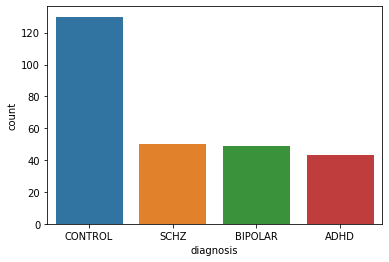

In [40]:
sns.countplot(p['diagnosis']);

# Extract MRI Image data

In [165]:
import os 
import numpy as np

In [166]:
from nibabel.testing import data_path

In [171]:
image_file = os.path.join(data_path, '/Users/sarahting/desktop/sub-10290_anat_sub-10290_T1w.nii.gz')

In [172]:
import nibabel as nib
image = nib.load(image_file)

In [199]:
image.shape

(176, 256, 256)

In [265]:
#print(image)

# View Image

In [201]:
import nibabel as nib
epi_img = nib.load('/Users/sarahting/desktop/sub-10290_anat_sub-10290_T1w.nii.gz')
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

(176, 256, 256)

In [202]:
import matplotlib.pyplot as plt

def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

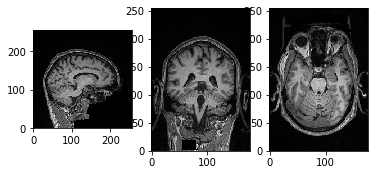

In [207]:
slice_0 = epi_img_data[100, :, :]
slice_1 = epi_img_data[:, 100, :]
slice_2 = epi_img_data[:, :, 100]
show_slices([slice_0, slice_1, slice_2])

In [209]:
import nibabel as nib
img = nib.load('/Users/sarahting/desktop/sub-10225_func_sub-10225_task-bart_bold.nii.gz')
img_data = epi_img.get_fdata()
img_data.shape

(176, 256, 256)

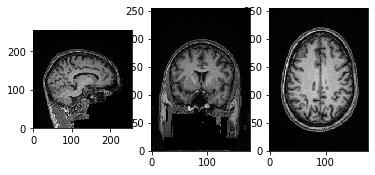

In [252]:
slice_0 = img_data[100, :, :]
slice_1 = img_data[:, 150, :]
slice_2 = img_data[:, :, 150]
show_slices([slice_0, slice_1, slice_2])

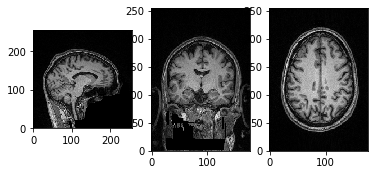

In [272]:
# Control 10171 Anatomy
import nibabel as nib
c1_image = nib.load('/Users/sarahting/desktop/sub-10171_anat_sub-10171_T1w.nii.gz')
c1_image_data = epi_img.get_fdata()

slice_c0 = c1_image_data[80, :, :]
slice_c1 = c1_image_data[:, 130, :]
slice_c2 = c1_image_data[:, :, 150]
show_slices([slice_c0,slice_c1,slice_c2])

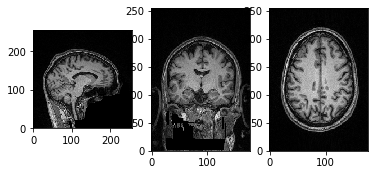

In [270]:
#Patient 50004 Anatomy
import nibabel as nib
p1_image = nib.load('/Users/sarahting/desktop/sub-50004_anat_sub-50004_T1w.nii.gz')
p1_image_data = epi_img.get_fdata()

slice_p0 = p1_image_data[80, :, :]
slice_p1 = p1_image_data[:, 130, :]
slice_p2 = p1_image_data[:, :, 150]
show_slices([slice_p0,slice_p1,slice_p2])